In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 20,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [39]:
local_df = pd.read_csv("../measurements/local_long/map.csv")


normal_cha_df = pd.read_csv("../measurements/real_bw_test/characteristic.csv")
normal_time_df = pd.read_csv("../measurements/real_bw_test/time.csv")

jpeg_cha_df = pd.read_csv("../measurements/real_bw_test_15fps/characteristic.csv")
jpeg_time_df = pd.read_csv("../measurements/real_bw_test_15fps/time.csv")

no_jpeg_cha_df = pd.read_csv("../measurements/real_bw_no_jpeg/characteristic.csv")
no_jpeg_time_df = pd.read_csv("../measurements/real_bw_no_jpeg/time.csv")

# local_df = pd.read_csv("../measurements/local_long/map.csv")


# normal_cha_df = pd.read_csv("../measurements/real_bw_test_15fps/characteristic.csv")
# normal_time_df = pd.read_csv("../measurements/real_bw_test_15fps/time.csv")

# jpeg_cha_df = pd.read_csv("../measurements/static_test_15fps/characteristic.csv")
# jpeg_time_df = pd.read_csv("../measurements/static_test_15fps/time.csv")

# no_jpeg_cha_df = pd.read_csv("../measurements/static_test_low/characteristic.csv")
# no_jpeg_time_df = pd.read_csv("../measurements/static_test_low/time.csv")

In [40]:
cal_time = []
for i in range(len(no_jpeg_time_df)):
    if no_jpeg_time_df["technique"][i] == 2:
        cal_time.append(no_jpeg_time_df["compression_time"][i]/32)
    else:
        cal_time.append(no_jpeg_time_df["compression_time"][i])
no_jpeg_time_df["compression_time"] = cal_time

In [41]:
normal_time_df["transmission_time"] = normal_cha_df["datasize_est"]*8/normal_cha_df["consumed_bw"]
normal_time_df["overall_est"] = normal_time_df["model_head_time"]+normal_time_df["model_tail_time"]+normal_time_df["framework_head_time"]+normal_time_df["framework_tail_time"] + normal_time_df["compression_time"]+normal_time_df["decompression_time"]+ normal_time_df["transmission_time"]

jpeg_time_df["transmission_time"] = jpeg_cha_df["datasize_est"]*8/jpeg_cha_df["consumed_bw"]
jpeg_time_df["overall_est"] = jpeg_time_df["model_head_time"]+jpeg_time_df["model_tail_time"]+jpeg_time_df["framework_head_time"]+jpeg_time_df["framework_tail_time"] + jpeg_time_df["compression_time"]+jpeg_time_df["decompression_time"]+ jpeg_time_df["transmission_time"]

no_jpeg_time_df["transmission_time"] = no_jpeg_cha_df["datasize_est"]*8/no_jpeg_cha_df["consumed_bw"]
no_jpeg_time_df["overall_est"] = no_jpeg_time_df["model_head_time"]+no_jpeg_time_df["model_tail_time"]+no_jpeg_time_df["framework_head_time"]+no_jpeg_time_df["framework_tail_time"] + no_jpeg_time_df["compression_time"]+no_jpeg_time_df["decompression_time"]+ no_jpeg_time_df["transmission_time"]

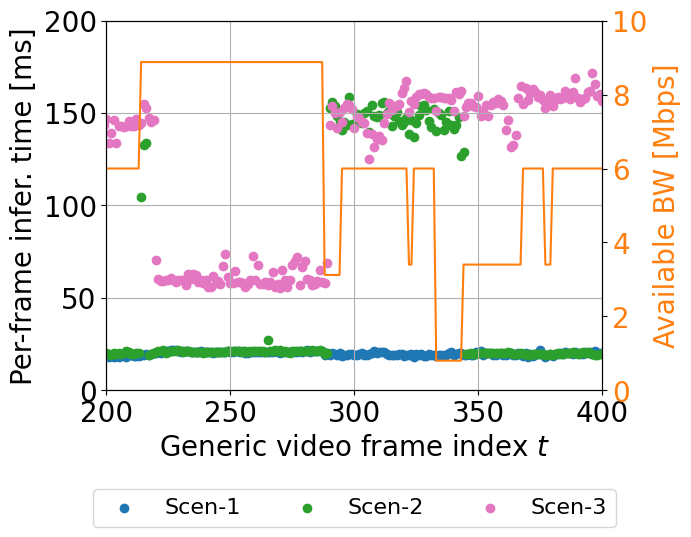

In [46]:
fig, ax1 = plt.subplots()
ax1.scatter(jpeg_time_df["frame_id"], jpeg_time_df["overall_est"], label="Scen-1",color="tab:blue")
ax1.scatter(normal_time_df["frame_id"], normal_time_df["overall_est"], label="Scen-2",color="tab:green")
ax1.scatter(no_jpeg_time_df["frame_id"], no_jpeg_time_df["overall_est"], label="Scen-3",color="tab:pink")

ax2 = ax1.twinx() 
color = 'tab:orange'
ax2.set_ylabel('Available BW [Mbps]', color=color)  # we already handled the x-label with ax1
ax2.plot(normal_cha_df["frame_id"].to_numpy(),normal_cha_df["bandwidth"]/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_ylim([0, 200])
ax1.set_xlim([200,400])
ax2.set_ylim([0,10])
ax1.grid()
ax1.set_ylabel("Per-frame infer. time [ms]")
ax1.set_xlabel('Generic video frame index $t$')
ax1.legend(ncol=3,loc='lower center', bbox_to_anchor=(0.5, -0.4),fontsize=16)
plt.savefig("../figures/inference_time.pdf", bbox_inches='tight')
